In [1]:
api_key = 'b57ab97ae8a3d60c5d6a4f230c8122f8'

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
#import time #????? 




# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "outputfile.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180) 

In [12]:
# List for holding lat_lngs and cities 
lat_lngs = [] 
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) 
#cities


610

In [3]:
# create url to send to web 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
#http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b57ab97ae8a3d60c5d6a4f230c8122f8&q=tempe

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind_speed = []

# count the calls 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        temp.append(response["main"]["temp"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        
        # number next call, loop to next city 
        record= record + 1
        
        
    # except for when the city is not found 
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Corinto
Processing Record 2 | Albany
Processing Record 3 | Ushuaia
Processing Record 4 | Busselton
Processing Record 5 | Kapaa
City not found. Skipping...
Processing Record 6 | Gori
Processing Record 7 | Sao Filipe
Processing Record 8 | Airai
Processing Record 9 | Cayenne
Processing Record 10 | Carballo
Processing Record 11 | Isangel
Processing Record 12 | Tuatapere
Processing Record 13 | Kruisfontein
Processing Record 14 | Hilo
Processing Record 15 | Sarrebourg
Processing Record 16 | Kasongo-Lunda
Processing Record 17 | Port Alfred
Processing Record 18 | Mataura
Processing Record 19 | Aykhal
Processing Record 20 | Bonthe
Processing Record 21 | Dikson
Processing Record 22 | Karabanovo
Processing Record 23 | Gubbio
Processing Record 24 | Rikitea
City not found. Skipping...
Processing Record 25 | Sirathu
Processing Record 26 | Saskylakh
Processing Record 27 | Mogadishu
Processing Record 28 | Brae
Processing Re

Processing Record 229 | Champerico
Processing Record 230 | Norman Wells
Processing Record 231 | Bagotville
Processing Record 232 | Krasnouralsk
Processing Record 233 | Chenzhou
City not found. Skipping...
Processing Record 234 | Sekoma
Processing Record 235 | Roald
City not found. Skipping...
Processing Record 236 | Belaya Gora
Processing Record 237 | Ahvaz
Processing Record 238 | Soligalich
Processing Record 239 | Waipawa
Processing Record 240 | Sosnogorsk
Processing Record 241 | Unai
Processing Record 242 | Lhokseumawe
Processing Record 243 | Chunskiy
Processing Record 244 | Mahibadhoo
Processing Record 245 | Vardo
Processing Record 246 | Semey
Processing Record 247 | Cap-aux-Meules
Processing Record 248 | Torbay
Processing Record 249 | Rabo de Peixe
Processing Record 250 | Lorengau
Processing Record 251 | Port Blair
Processing Record 252 | Mahajanga
Processing Record 253 | Nizwa
City not found. Skipping...
City not found. Skipping...
Processing Record 254 | Diapaga
Processing Record

Processing Record 457 | Angoram
Processing Record 458 | Kuopio
Processing Record 459 | Nyurba
Processing Record 460 | San Patricio
Processing Record 461 | Luancheng
Processing Record 462 | Dolores Hidalgo
Processing Record 463 | Great Falls
Processing Record 464 | Mehamn
Processing Record 465 | Lasa
Processing Record 466 | Paraiso
Processing Record 467 | Leninskoye
City not found. Skipping...
Processing Record 468 | Gallup
Processing Record 469 | Svetlogorsk
City not found. Skipping...
Processing Record 470 | Yar-Sale
Processing Record 471 | Gazli
City not found. Skipping...
Processing Record 472 | Grand Forks
Processing Record 473 | Tuli
Processing Record 474 | Kiunga
Processing Record 475 | Carira
Processing Record 476 | Ilhabela
Processing Record 477 | Smithers
Processing Record 478 | Kamenka
Processing Record 479 | Selikhino
Processing Record 480 | Oyama
Processing Record 481 | Noumea
Processing Record 482 | Mayo
Processing Record 483 | Sao Joao da Barra
Processing Record 484 | Ket

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Temp": temp,
    "Wind Speed":wind_speed
}

# convert dictionary to df
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Temp          559
Wind Speed    559
dtype: int64

In [6]:
# export the data into a csv 
weather_data.to_csv('outputdata.csv')

# Display data frame head 
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temp,Wind Speed
0,Corinto,75,CO,1562799903,51,3.17,-76.26,84.20,11.41
1,Albany,1,US,1562799627,54,42.65,-73.75,82.24,1.88
2,Ushuaia,40,AR,1562799728,86,-54.81,-68.31,37.40,4.70
3,Busselton,68,AU,1562799904,76,-33.64,115.35,45.00,8.28
4,Kapaa,40,US,1562799904,74,22.08,-159.32,82.67,12.75


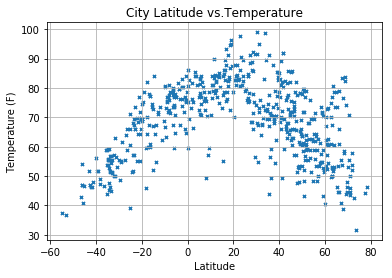

In [7]:
#scatter plot for lat and temp 
plt.scatter(weather_data["Lat"], weather_data["Temp"], marker="x", s=10)

# label graph 
plt.title("City Latitude vs.Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save graph 
plt.savefig("Latitude V Temperature") 


plt.show() 

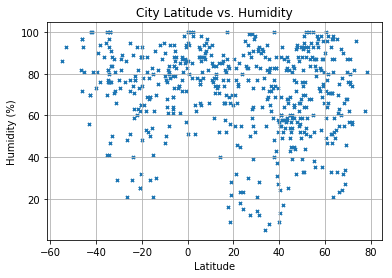

In [8]:
#scatter plot for lat and humidity 
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="x", s=10)

#labels
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save graph 
plt.savefig("Latitude V Humidity")


plt.show()


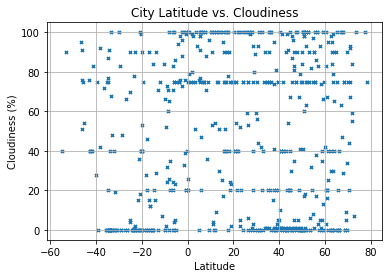

In [9]:
# scatter plot for latitude and cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="x", s=10)

# labels
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save graph 
plt.savefig("Latitude V Cloudiness")


plt.show()


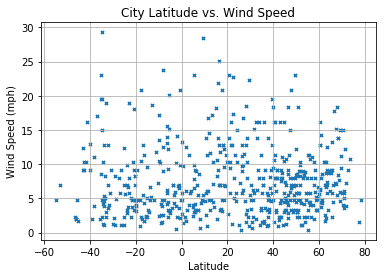

In [10]:
# catter plot for latitude and wind speed 
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="x", s=10)

# labels 
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save graph 
plt.savefig("Latitude V Windspeed")


plt.show()
